#**Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',None)

**Load Dataset**

In [3]:
df = pd.read_csv("crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Event Type,Event ID,Date/Time,Year,Month,Day,Hour,Minutes,Latitude,Longitude
0,0,Information Against Police,0,2021-04-01 00:00:00,2021,4,1,0,0,26.834,81.008
1,1,Threat In Person,1,2021-04-01 12:09:00,2021,4,1,12,9,26.828,81.014
2,2,Dispute,2,2021-04-01 12:51:00,2021,4,1,12,51,26.840,81.009
3,3,Gambling,3,2021-04-01 13:10:00,2021,4,1,13,10,26.828,81.002
4,4,Threat In Person,1,2021-04-01 13:18:00,2021,4,1,13,18,26.834,81.033


In [5]:
df.drop(columns="Unnamed: 0", inplace=True)

#**Feature Engineering**

In [6]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df.describe()

,Event ID,Year,Month,Day,Hour,Minutes,Latitude,Longitude
count,4843.000000,4843.0,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,6.918233,2021.0,4.913896,15.621722,14.787322,29.578980,26.864504,81.023346
std,8.193998,0.0,0.843996,8.688265,6.364090,17.328272,0.052806,0.091751
min,0.000000,2021.0,4.000000,1.000000,0.000000,0.000000,25.423000,77.458000
25%,2.000000,2021.0,4.000000,8.000000,11.000000,14.000000,26.850000,81.005000
50%,4.000000,2021.0,5.000000,15.000000,16.000000,30.000000,26.864000,81.021000
75%,10.000000,2021.0,6.000000,23.000000,20.000000,45.000000,26.877000,81.041000
max,51.000000,2021.0,6.000000,31.000000,23.000000,59.000000,29.290000,83.725000


In [7]:
df.head()

,Event Type,Event ID,Date/Time,Year,Month,Day,Hour,Minutes,Latitude,Longitude
0,Information Against Police,0,2021-04-01 00:00:00,2021,4,1,0,0,26.834,81.008
1,Threat In Person,1,2021-04-01 12:09:00,2021,4,1,12,9,26.828,81.014
2,Dispute,2,2021-04-01 12:51:00,2021,4,1,12,51,26.840,81.009
3,Gambling,3,2021-04-01 13:10:00,2021,4,1,13,10,26.828,81.002
4,Threat In Person,1,2021-04-01 13:18:00,2021,4,1,13,18,26.834,81.033


**Study of Data Relationship**

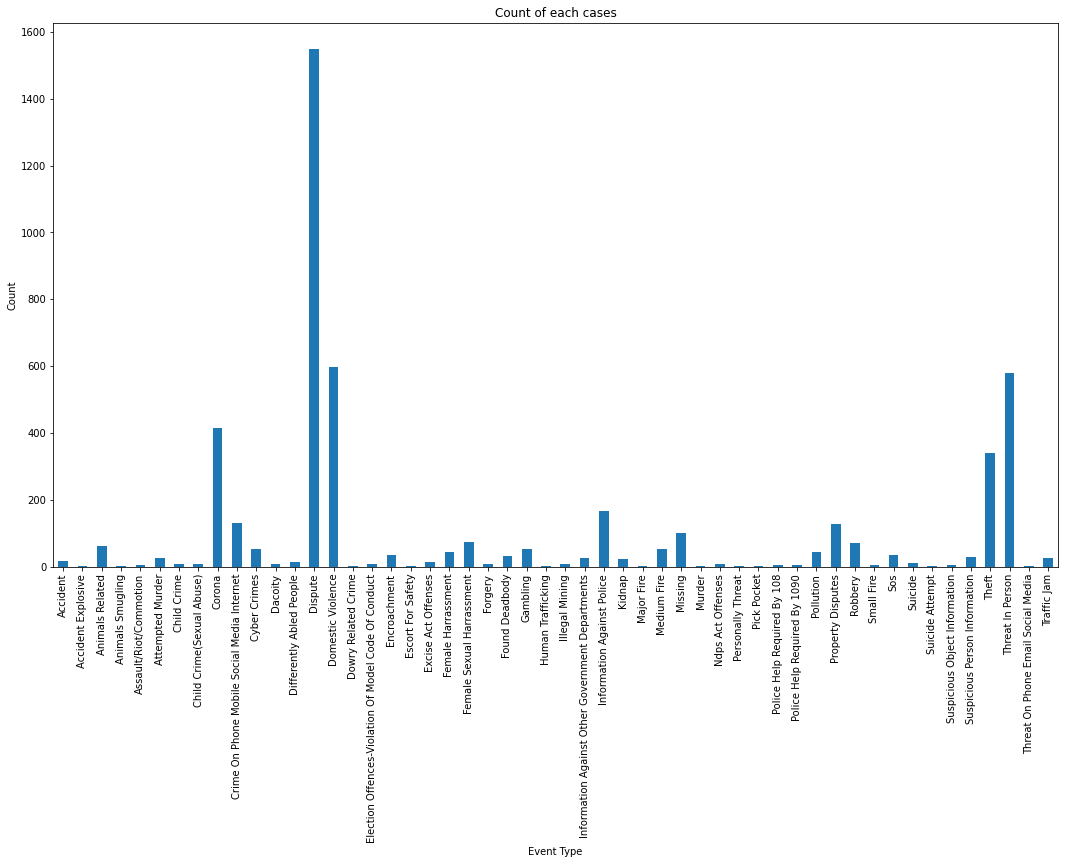

In [8]:
df.groupby("Event Type").size().plot(kind = "bar", figsize = (18,10), title="Count of each cases")
plt.ylabel("Count")
plt.show()

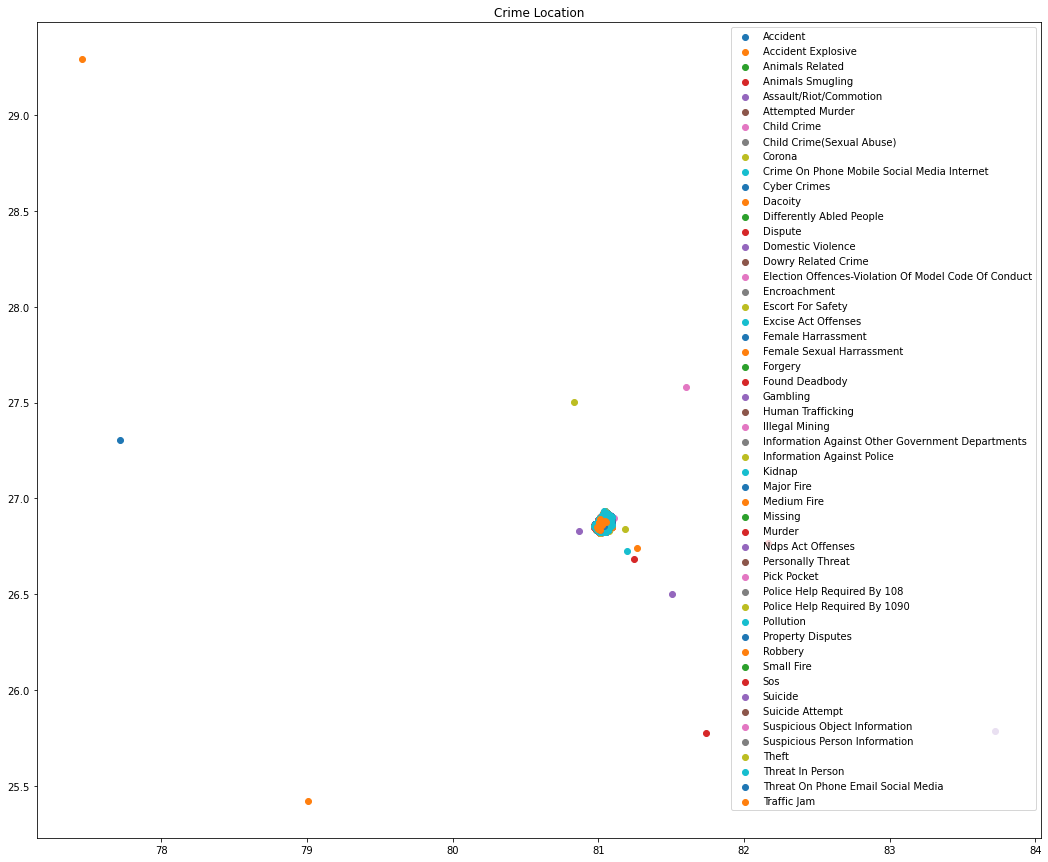

In [9]:
fig, ax = plt.subplots(figsize=(18,15))
plt.title("Crime Location")
for name, group in df.groupby('Event Type'):
    ax.scatter(x=group["Longitude"], y=group["Latitude"], label=name)

plt.legend(loc=1)
plt.show()

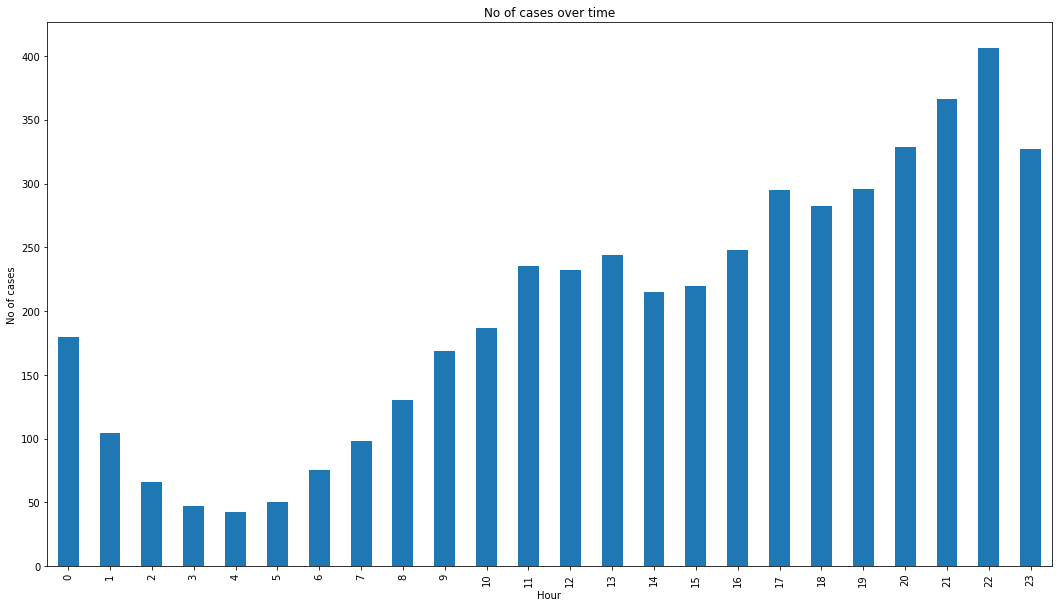

In [10]:
df.groupby("Hour").size().plot(kind="bar", figsize=(18,10), title="No of cases over time")
plt.ylabel("No of cases")
plt.show()

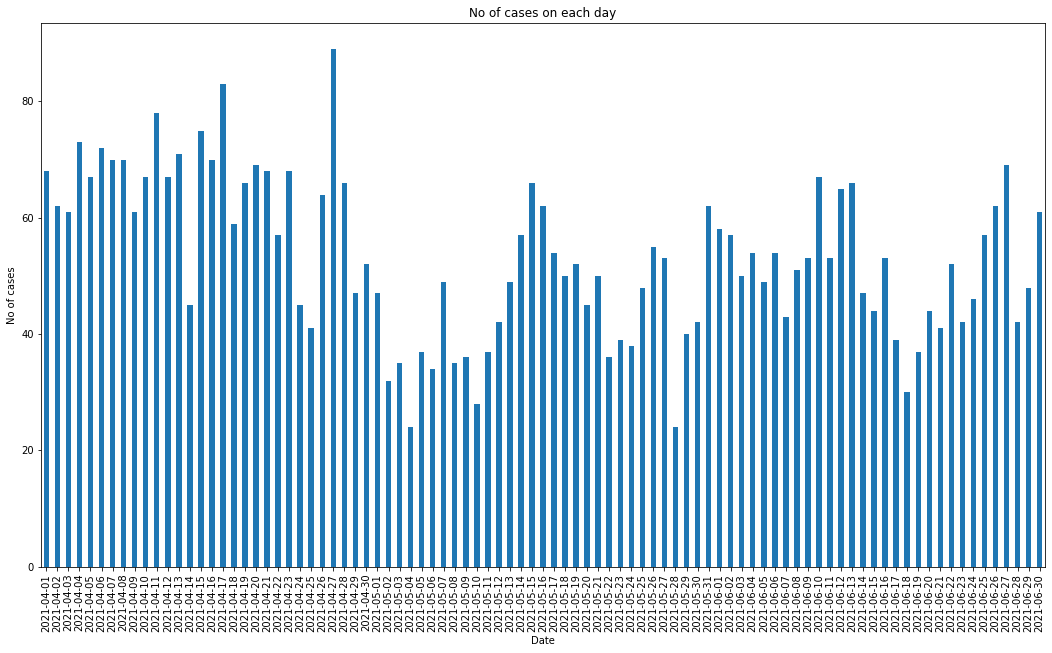

In [11]:
date = df.copy()
date["Date"] = df["Date/Time"].dt.date
date.groupby("Date").size().plot(kind="bar",
                                figsize=(18,10),
                                title="No of cases on each day")

plt.ylabel("No of cases")
plt.show()

#**Outlier Detection**

In [12]:
def Plot(df,var):
    plt.figure(figsize=(18,10))
    #Histogram
    plt.subplot(1,2,1)
    plt.hist(df[var],alpha=0.5)
    #Box plot
    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.show()
    

In [13]:
df.describe()

,Event ID,Year,Month,Day,Hour,Minutes,Latitude,Longitude
count,4843.000000,4843.0,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,6.918233,2021.0,4.913896,15.621722,14.787322,29.578980,26.864504,81.023346
std,8.193998,0.0,0.843996,8.688265,6.364090,17.328272,0.052806,0.091751
min,0.000000,2021.0,4.000000,1.000000,0.000000,0.000000,25.423000,77.458000
25%,2.000000,2021.0,4.000000,8.000000,11.000000,14.000000,26.850000,81.005000
50%,4.000000,2021.0,5.000000,15.000000,16.000000,30.000000,26.864000,81.021000
75%,10.000000,2021.0,6.000000,23.000000,20.000000,45.000000,26.877000,81.041000
max,51.000000,2021.0,6.000000,31.000000,23.000000,59.000000,29.290000,83.725000


#Mapping Data Preparation

In [14]:
map = df.copy()

In [15]:
map.head()

,Event Type,Event ID,Date/Time,Year,Month,Day,Hour,Minutes,Latitude,Longitude
0,Information Against Police,0,2021-04-01 00:00:00,2021,4,1,0,0,26.834,81.008
1,Threat In Person,1,2021-04-01 12:09:00,2021,4,1,12,9,26.828,81.014
2,Dispute,2,2021-04-01 12:51:00,2021,4,1,12,51,26.840,81.009
3,Gambling,3,2021-04-01 13:10:00,2021,4,1,13,10,26.828,81.002
4,Threat In Person,1,2021-04-01 13:18:00,2021,4,1,13,18,26.834,81.033


In [16]:
map.drop(columns=["Event ID", "Year", "Month", "Day", "Hour", "Minutes"], inplace=True)


In [50]:
map.groupby(["Event Type"]).head()

,Event Type,Date/Time,Latitude,Longitude
0,Information Against Police,2021-04-01 00:00:00,26.834,81.008
1,Threat In Person,2021-04-01 12:09:00,26.828,81.014
2,Dispute,2021-04-01 12:51:00,26.840,81.009
3,Gambling,2021-04-01 13:10:00,26.828,81.002
4,Threat In Person,2021-04-01 13:18:00,26.834,81.033
...,...,...,...,...
4307,Police Help Required By 1090,2021-04-13 14:15:00,26.866,81.016
4352,Police Help Required By 108,2021-04-17 21:54:00,26.870,81.014
4461,Suicide Attempt,2021-04-28 00:32:00,26.865,81.024
4623,Police Help Required By 1090,2021-05-31 10:18:44,27.503,80.836


In [46]:
map["Event Type"].replace({"Assault/Riot/Commotion":"Assault Riot Commotion"}, inplace=True)

In [ ]:
for event, data in map.groupby(["Event Type"]):
    # data.to_csv("Mapping Data\{}.csv".format(event))
    pass